In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
#!pip install scikit-learn

Emplearemos un conjunto de datos sencillo, altura y edad de los alumnos en clase. ¿Podemos derivar uno del otro?

$$

altura = \beta_1 edad + \beta_0

$$

In [3]:
lista_alumnos = [("Leonardo S", 24, 1.82), 
                 ("Piero T", 25, 1.71), 
                 ("Marta B", 35, 1.66), 
                 ("Silvia P", 37, 1.63), 
                 ("Faro Z", 29, 1.90), 
                 ("Miguel N", 27, 1.80), 
                 ("Alejandro M", 28, 1.70), 
                 ("Cristina M", 32, 1.60), 
                 ("Francisco P", 36, 1.74), 
                 ("Jorge D", 45, 1.72), 
                 ("Jesús L", 41, 1.65), 
                 ("Marta G", 30, 1.65), 
                 ("Jennifer S", 40, 1.60), 
                 ("Diego I", 39, 1.80), 
                 ("Antonio C", 23, 1.77), 
                 ("Juan M", 32, 1.75), 
                 ("David S", 27, 1.70), 
                 ("Antonio J", 34, 1.80), 
                 ("Carlos H", 27, 1.77), 
                 ("Erik U", 28, 1.70), 
                 ("Marcos L", 35, 1.80)] 

# Ejercicio 1.

Obten un dataframe de los datos indicados.

In [4]:
df = pd.DataFrame(lista_alumnos, columns=["Nombre", "Edad", "Altura"])

df

,Nombre,Edad,Altura
0,Leonardo S,24,1.82
1,Piero T,25,1.71
2,Marta B,35,1.66
3,Silvia P,37,1.63
4,Faro Z,29,1.90
5,Miguel N,27,1.80
6,Alejandro M,28,1.70
7,Cristina M,32,1.60
8,Francisco P,36,1.74
9,Jorge D,45,1.72


# Ejercicio 2

Realiza una descripción de las distribuciones de las variables.

In [5]:
display(df.info(), df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  21 non-null     object 
 1   Edad    21 non-null     int64  
 2   Altura  21 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 636.0+ bytes


None

,Edad,Altura
count,21.000000,21.000000
mean,32.095238,1.727143
std,6.081980,0.079003
min,23.000000,1.600000
25%,27.000000,1.660000
50%,32.000000,1.720000
75%,36.000000,1.800000
max,45.000000,1.900000


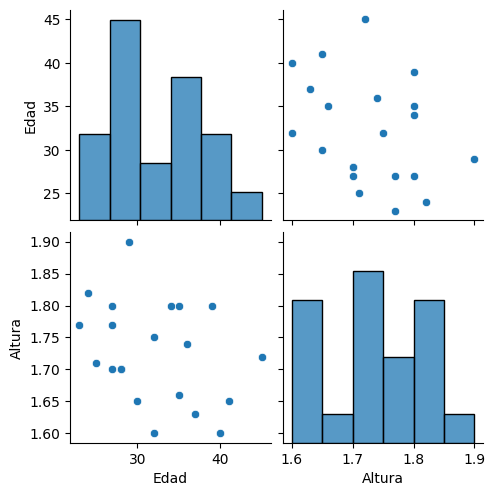

In [6]:
sns.pairplot(df);

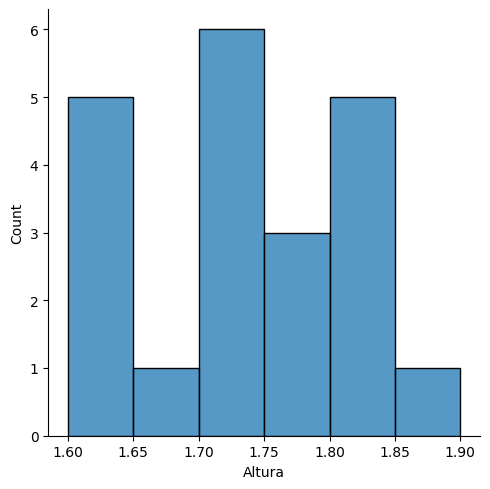

In [7]:
sns.displot(df['Altura']);

In [8]:
corr = df.corr(numeric_only=True)
corr

,Edad,Altura
Edad,1.000000,-0.329275
Altura,-0.329275,1.000000


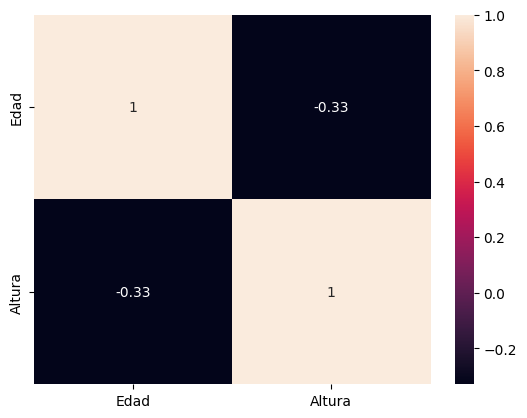

In [9]:
sns.heatmap(corr, annot=True);

# Ejercicio 3

Divide el conjunto de datos en _train_ y _test_

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Edad']], df[['Altura']], test_size = 0.30, random_state = 10)

In [12]:

print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Train features shape: (14, 1)
Train target shape: (14, 1)
Test features shape: (7, 1)
Test target shape: (7, 1)


# Ejercicio 4

Entrena un modelo de regresión lineal

In [15]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [16]:
lm.score(X_train, y_train)

0.08418593696989685

In [17]:
lm.score(X_test, y_test)

-0.2575650813716879

# Ejercicio 5

Analiza los coeficientes.

In [18]:
lm.intercept_

array([1.85490668])

In [19]:
lm.coef_

array([[-0.00340971]])

# Ejercicio 6

Evalúa visualmente el modelo.

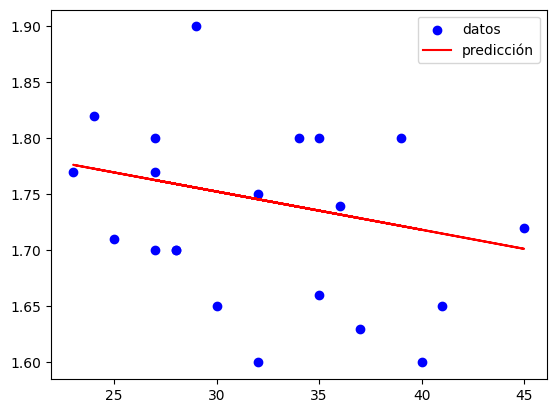

In [23]:
plt.scatter(df['Edad'], df['Altura'], color="b", label="datos")
plt.plot(df['Edad'], lm.predict(df[['Edad']]), color="r", label="predicción")
plt.legend()

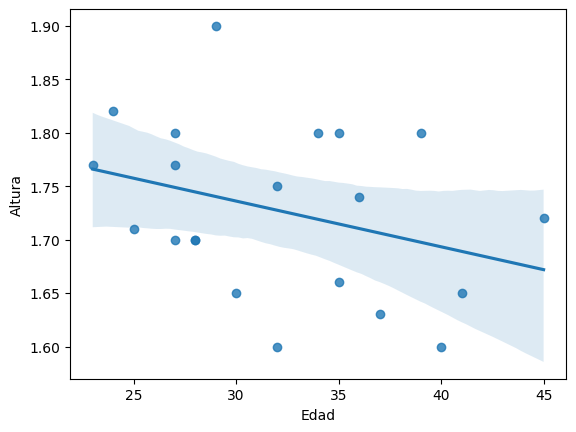

In [24]:
sns.regplot(data=df, x = 'Edad', y = 'Altura');

# Ejercicio 7

Obtén las métricas de error relevantes para este modelo.

In [26]:
from sklearn.metrics import mean_squared_error

y_pred = lm.predict(X_test)

mean_squared_error(y_test, y_pred)


0.006960237756489836

In [27]:
df_eval = pd.DataFrame(X_test)
df_eval['Predicción'] = y_pred
df_eval['Valor Real'] = y_test
df_eval['Error'] = abs(df_eval['Predicción'] - df_eval['Valor Real'])
df_eval

,Edad,Predicción,Valor Real,Error
14,23,1.776483,1.77,0.006483
5,27,1.762845,1.80,0.037155
2,35,1.735567,1.66,0.075567
11,30,1.752616,1.65,0.102616
7,32,1.745796,1.60,0.145796
18,27,1.762845,1.77,0.007155
3,37,1.728748,1.63,0.098748
